# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

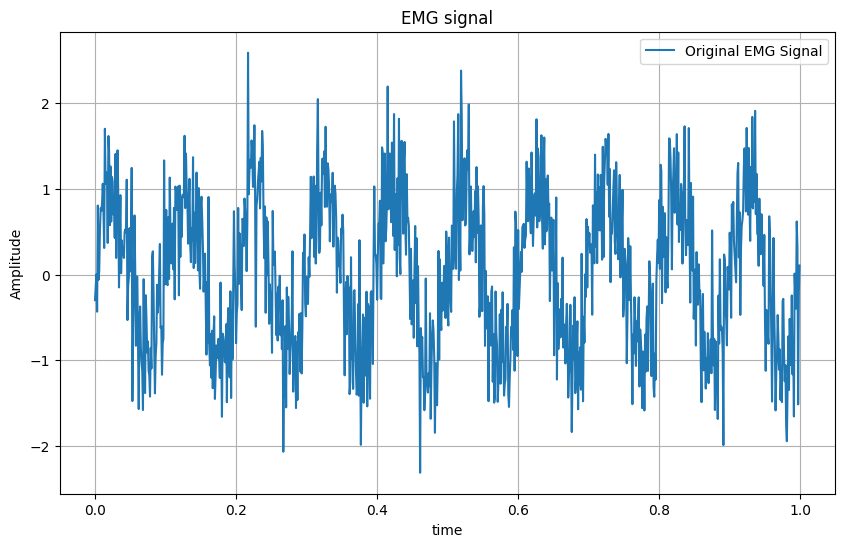

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt



fs = 1000
t = np.arange(0, 1, 1/fs)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.ylabel('Amplitude')
plt.xlabel('time')
plt.title('EMG signal')
plt.legend()
plt.grid(True)
plt.show()


In [3]:

import plotly.graph_objects as go

def butter_lowpass_filter(data, cutoff, fs, order):
    nyq=0.5*fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

cutoff = 16
order = 2
y = butter_lowpass_filter(emg_signal, cutoff, fs, order)

In [4]:

fig = go.Figure()
fig.add_trace(go.Scatter( y = emg_signal,line =  dict(shape =  'spline' ),name = 'signal with noise'))
fig.add_trace(go.Scatter( y = y,line =  dict(shape =  'spline' ),name = 'filtered signal'))
fig.show()

## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

In [5]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(y)


Answer the Question here:  we can adjust the threshold and the distance parameter

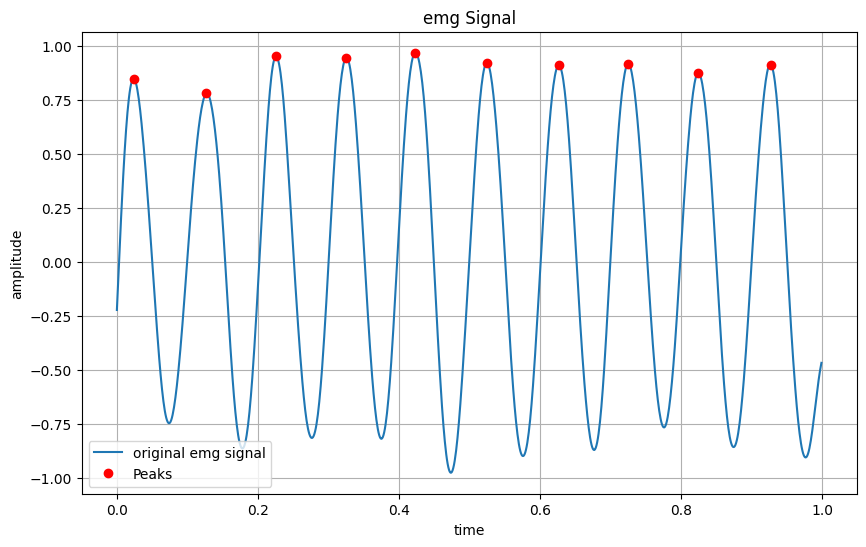

In [6]:

plt.figure(figsize=(10, 6))
plt.plot(t, y, label='original emg signal')

plt.plot(t[peaks], y[peaks], 'ro', label='Peaks')
plt.title('emg Signal')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.legend()
plt.grid(True)
plt.show()

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

In [7]:
threshold = 0.4

cstarts = []
for i in range(1, len(y)):
    if y[i-1] < threshold and y[i] >= threshold:
        cstarts.append(i)

print(cstarts)

cstops = []
for i in range(1, len(y)):
    if y[i-1] >= threshold and y[i] < threshold:
        cstops.append(i)

print(cstops)

starts=[]
for n in range(0, len(cstarts)):
    starttime = cstarts[n]/1000
    starts.append(starttime)

print(starts)

stops=[]
for n in range(0, len(cstops)):
    stoptime = cstops[n]/1000
    stops.append(stoptime)

print(stops)

[10, 110, 209, 308, 405, 507, 609, 707, 807, 908]
[42, 146, 244, 345, 443, 544, 645, 745, 843, 944]
[0.01, 0.11, 0.209, 0.308, 0.405, 0.507, 0.609, 0.707, 0.807, 0.908]
[0.042, 0.146, 0.244, 0.345, 0.443, 0.544, 0.645, 0.745, 0.843, 0.944]


Answer the Question here:  to identify when the activaton of muscle start and end, so that we can capture the movement of the muscle precisely

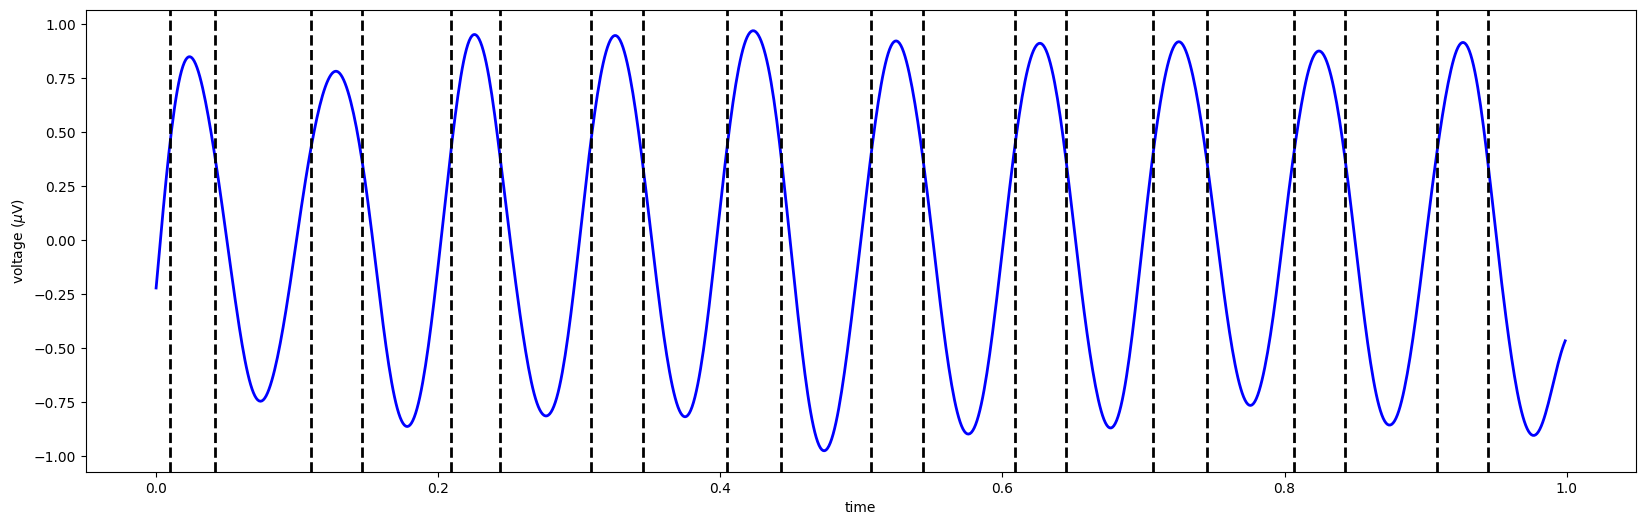

In [8]:

plt.figure(figsize=(20,6))
plt.xlabel('time')
plt.ylabel('voltage ($\mu$V)')
plt.plot(t, y, 'b', linewidth=2.0)
for n in range(0, len(starts)):
    plt.axvline(x=starts[n], color='k',linewidth=2.0, linestyle='--')
for n in range(0, len(stops)):
    plt.axvline(x=stops[n], color='k',linewidth=2.0, linestyle='--')


## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.

In [ ]:
from scipy.signal import hilbert

analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))


Answer the Question here:  it gives us info about the  movement of the muscle the intensity and for what time there was activity in  the muscle

NameError: name 'amplitude_envelope' is not defined

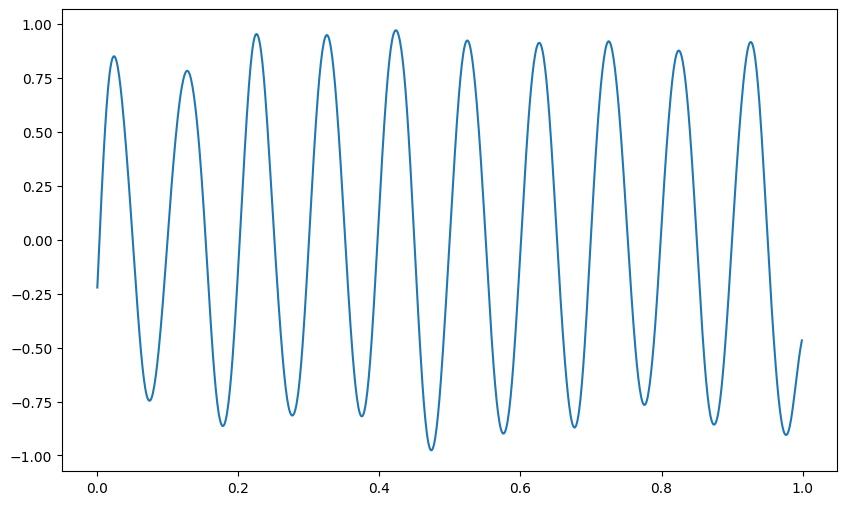

In [9]:
#
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Original EMG Signal')

plt.plot(t, amplitude_envelope, label='Amplitude Envelope')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [ ]:


mean = np.mean(y)
variance = np.var(y)

print("Mean:", mean)
print("Variance:", variance)


rms = np.sqrt(np.mean(y**2))

print("RMS:", rms)

Mean: -0.021503234815890775
Variance: 0.369246348206104
RMS: 0.6080367894409444


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.

In [10]:
N = len(y)
freq = np.fft.rfftfreq(N, d=1/fs)
fft_result = np.abs(np.fft.rfft(y))

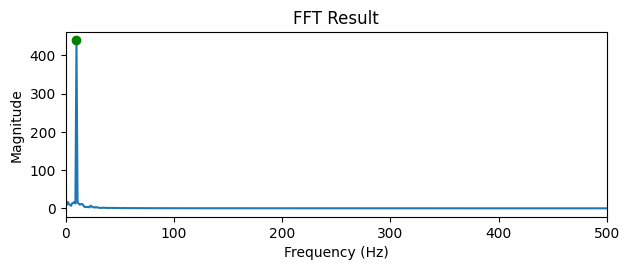

In [11]:
peaks, _ = find_peaks(fft_result,threshold=50)


plt.subplot(2, 1, 2)
plt.plot(freq, fft_result)

plt.plot(freq[peaks], fft_result[peaks], 'go', label='Peaks')

plt.title('FFT Result')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)
plt.tight_layout()
plt.show()